In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,median_absolute_error

In [184]:
datos = pd.read_csv("/content/drive/MyDrive/Semillero/cleaned_data.csv", index_col=False)
datos

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,5,1,3,12691.0,777,11914.0,1144,42,...,0,0,0,1,0,0,1,0,0,0
1,49,5,6,1,2,8256.0,864,7392.0,1291,33,...,1,0,0,0,0,1,1,0,0,0
2,51,3,4,1,0,3418.0,0,3418.0,1887,20,...,0,0,0,0,1,0,1,0,0,0
3,40,4,3,4,1,3313.0,2517,796.0,1171,20,...,0,0,0,0,0,1,1,0,0,0
4,40,3,5,1,0,4716.0,0,4716.0,816,28,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,3,2,3,4003.0,1851,2152.0,15476,117,...,1,0,1,0,0,0,1,0,0,0
10123,41,2,4,2,3,4277.0,2186,2091.0,8764,69,...,0,0,1,0,0,0,1,0,0,0
10124,44,1,5,3,4,5409.0,0,5409.0,10291,60,...,0,0,0,0,0,1,1,0,0,0
10125,30,2,4,3,3,5281.0,0,5281.0,8395,62,...,0,0,1,0,0,0,1,0,0,0


# Division de datos
Haremos una de division de datos en testeo y entrenamiento. Este corresponde a un 20% de los datos para testear

In [185]:
X= datos.drop("Total_Trans_Amt",axis=1)
y = datos["Total_Trans_Amt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"la longitud de X es {X_train.shape} y la longitud de y {y_train.shape}")

la longitud de X es (8101, 32) y la longitud de y (8101,)


# Escalamiento de los datos
En este paso del proceso transformaremos nuestros datos para que se encuentre entre 0 y 1. Usando el algoritmo MinMax el cual identifica el valor mayor y le asigna el valor 1 y el valor menor le asigna el valor 0. el resto de los datos se tranforman usando operaciones aritmeticas



In [186]:
escalador_x = preprocessing.MinMaxScaler()
escalador_y = preprocessing.MinMaxScaler()

X_train = pd.DataFrame(escalador_x.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(escalador_x.fit_transform(X_test), columns=X_test.columns)
y_train=escalador_y.fit_transform(y_train.values.reshape(-1,1))
y_test=escalador_y.fit_transform(y_test.values.reshape(-1,1))
X_train

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Ct,Avg_Utilization_Ratio,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.636364,0.2,0.0,0.500000,0.500000,0.069071,0.686532,0.057717,0.689922,0.464464,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.727273,0.8,0.0,0.666667,0.500000,0.119649,0.716329,0.104019,0.224806,0.334334,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.431818,0.8,1.0,0.166667,0.500000,0.439834,0.654748,0.415380,0.201550,0.103103,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.181818,0.4,0.6,0.500000,0.666667,0.066108,1.000000,0.032017,0.279070,0.694695,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.522727,0.4,0.8,0.500000,0.666667,0.038748,0.765197,0.022919,0.395349,0.708709,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,0.409091,0.2,0.4,0.333333,0.833333,0.081738,1.000000,0.046997,0.263566,0.608609,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8097,0.613636,0.6,0.6,0.500000,1.000000,0.196528,0.000000,0.229942,0.248062,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8098,0.363636,0.8,0.4,0.166667,0.333333,0.026474,0.614621,0.022137,0.496124,0.669670,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8099,0.318182,0.6,0.6,0.166667,0.166667,0.064234,0.678188,0.053690,0.248062,0.479479,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Entrenamiento del modelo.
Para entrenar los modelo de KNN es necesario encontrar cual es el k que nos brinda el mejor rendimieto. El primer paso sera encontrar ese valor de K. 

In [187]:
Ks=[]
errores_cuadraticos_medios =[]

for i in range(1,20):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)

  y_pred = knn.predict(X_test)
  ecm = mean_squared_error(y_test, y_pred)

  Ks.append(i)
  errores_cuadraticos_medios.append(ecm)

Text(0.5, 1.0, 'Rendimiento del modelo por cada k')

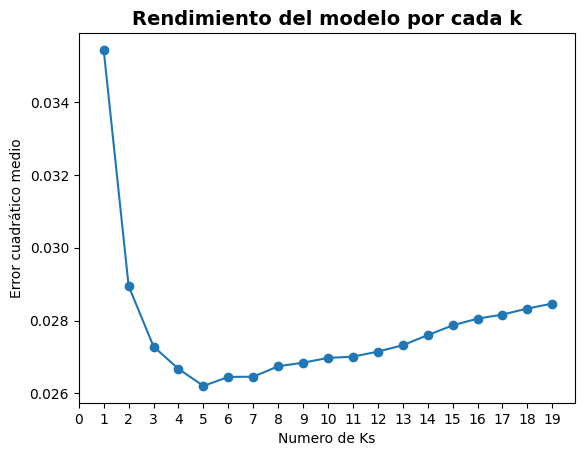

In [192]:
fig, ax = plt.subplots()
ax.plot(Ks,errores_cuadraticos_medios,marker="o")
ax.set_xticks(range(0, 20))

plt.ylabel('Error cuadrático medio')
plt.xlabel('Numero de Ks')
plt.title('Rendimiento del modelo por cada k',fontdict = {'fontsize':14, 'fontweight':'bold'})

Observando el grafico anterior determinamos que el valor de K que no brinda un mejor rendimiento del modelo es K=5.

In [189]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

ecm = mean_squared_error(y_test, y_pred)
eam = median_absolute_error(y_test,y_pred)
print("Error cuadrático medio (MSE):", ecm)
print("Error absoluto medio (MAE):", eam)


Error cuadrático medio (MSE): 0.026203654608317462
Error absoluto medio (MAE): 0.056536137582772435


Con estos dos valores el siguiente paso sera compararlos con los errores cuadraticos y error absoluto medio de mis otros modelos. 